In [1]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Lorenz'63

In [2]:
def lorenz(x, t, sigma, beta, rho):
    """The Lorenz equations
    """
    u, v, w = x
    up = - sigma * (u - v)
    vp = rho * u - v - u * w
    wp = - beta * w + u * v
    return up, vp, wp

In [3]:
# Lorenz paramters and initial conditions
sigma, beta, rho = 10, 2.667, 28
u0, v0, w0 = 0, 1, 1.05

# Maximum time point and total number of time points
tmax, n = 100, 10000

# Integrate the Lorenz equations on the time grid t
t = np.linspace(0, tmax, n)
sol = odeint(lorenz, (u0, v0, w0), t, args=(sigma, beta, rho))

## Evaluate the observable along the trajectory

In [4]:
def complexexp(sol, wv = [1,1,1], xmin = [0,0,0], xmax = [10,10,10]):
    wv = np.array(wv, ndmin=2).T
    xmin = np.array(xmin, ndmin=1)
    xmax = np.array(xmax, ndmin=1)
    
    sol = (sol - xmin) / (xmax - xmin)
    
    return np.exp( 2j*np.pi* np.dot(sol, wv) ).flatten()

In [5]:
obs = complexexp(sol,wv = [1,2,1] )

## Compute a running time average

In [6]:
def cumavg(tt,vv):
    timesteps = (tt[1:] - tt[0:-1])
    triangle_rule = ( vv[0:-1] + vv[1:] )/2
    
    out = np.cumsum( triangle_rule * timesteps) # compute cumulative integral T -> int_0^T f(t) dt
    out = out / tt[1:] # divide the integral by time duration
    return tt[1:],out

In [7]:
def plot_avg( tt, aa, fig = plt.figure() ):
    plt.subplot(121)
    plt.plot(tt, np.real(aa))
    plt.xlabel('Averaging time')
    plt.ylabel('Real part')

    plt.subplot(122)
    plt.plot(tt, np.imag(aa))
    plt.xlabel('Averaging time')
    plt.ylabel('Imaginary part')
    return fig

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

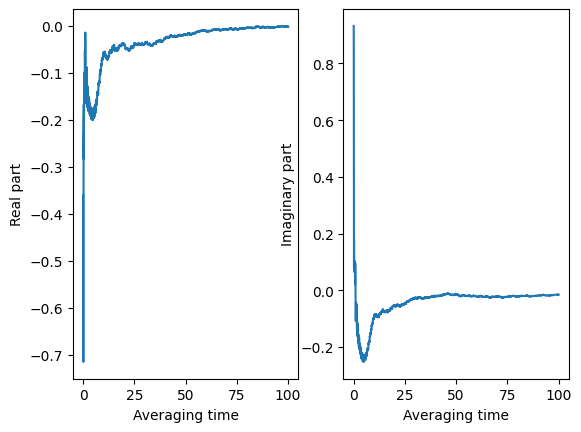

In [8]:
ta,a = cumavg(t,obs)
plot_avg(ta,a)

## Plot the trajectory, just for kicks

Based on the following script: https://gist.github.com/brews/37253ff1a31dc4525c5821f2436e39f0

In [9]:
def plot_lorenz( sol, fig=plt.figure() ):# Plot the Lorenz attractor using a Matplotlib 3D projection
    # Make the line multi-coloured by plotting it in segments of length s which
    # change in colour across the whole time series.
    s = 10
    c = np.linspace(0,1,n)
    ax = fig.gca()
    for i in range(0,n-s,s):
        ax.plot(sol[i:i+s+1,0], 
                 sol[i:i+s+1,1], 
                 color=(1,c[i],0), 
                 alpha=0.4)

    return fig


<Figure size 640x480 with 0 Axes>

## Let's get interactive

In [10]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [11]:
@interact
def _( wx = widgets.IntSlider(min=0,max=10,step=1), 
       wy = widgets.IntSlider(min=0,max=10,step=1), 
       wz = widgets.IntSlider(min=0,max=10,step=1), 
       tmax = widgets.IntSlider(min=10,max=200,step=10) ):
    
    t = np.linspace(0, tmax, tmax*100)
    sol = odeint(lorenz, (u0, v0, w0), t, args=(sigma, beta, rho))
    obs = complexexp(sol,wv = [wx,wy,wz] )
    ta,a = cumavg(t,obs)
    fig = plot_avg(ta,a)
    fig.add_subplot(1,3,2)
    plot_lorenz(sol,fig)
    return fig


interactive(children=(IntSlider(value=0, description='wx', max=10), IntSlider(value=0, description='wy', max=1…